# magnitude frequency plots for different SHARES and SEDIMENT input scenarious 

In [1]:
# import data
# convert units
# calculate magnitudes and frequency 
# plot things 



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator


In [3]:
# parameters
area = 4.83
# unit conversion
cf = (area * 10**6) * 10**-3  # km2 to m2 and mm to m

# functions

def calculate_monthly_sediment_yield(sediments):    

    # Create DataFrame for sediments with area considered
    sediments_area = pd.DataFrame()
    sediments_area['D'] = pd.to_datetime(sediments.D)
    sediments_area['Q100'] = sediments.Q100 * cf
    sediments_area['dfs'] = sediments.dfs * cf

    sediments_area['Qstl'] = sediments.Qstl * cf
    sediments_area['Qdftl'] = sediments.Qdftl * cf

    # reset index to date
    sediments_area = sediments_area.set_index('D')

    # Resample to monthly and calculate sum
    sym = sediments_area.resample('m').sum()

    # Calculate monthly sediment yield mean
    symm_month = sym.groupby(by=sym.index.month).mean().reset_index()

    return symm_month

def convert_units_to_volume(sediments):
    # Create DataFrame for sediments with area considered
    sediments_area = pd.DataFrame()
    sediments_area['D'] = pd.to_datetime(sediments.D)
    sediments_area['Q100'] = sediments.Q100 * cf
    # sediments_area['dfs'] = sediments.dfs * cf

    sediments_area['Qstl'] = sediments.Qstl * cf
    sediments_area['Qdftl'] = sediments.Qdftl * cf
    
    return sediments_area

In [4]:
path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/supply_limited/langtang_annual_mean/cellnr12/'
SedOut = pd.read_csv(path + 'Sediment.out')

In [5]:
df = calculate_monthly_sediment_yield(SedOut)

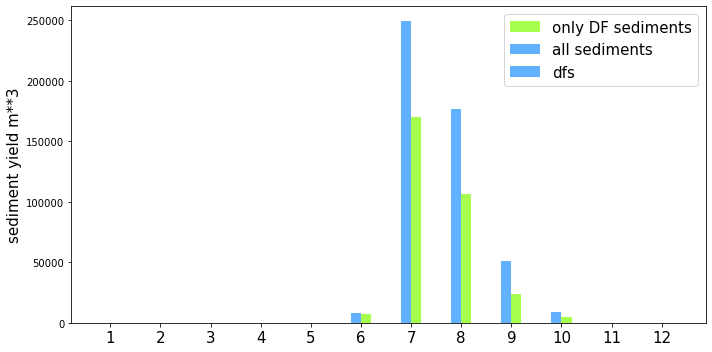

In [6]:

fig, ax = plt.subplots(figsize=(10, 5))

width = 0.2
ax.bar(x=df.D+0.1, height=df.Qdftl, width=width, label='only DF sediments',  alpha=0.7, color='chartreuse')
ax.bar(x=df.D-0.1,     height=df.Qstl, width=width,label='all sediments' , alpha=0.7, color= 'dodgerblue')
ax.bar(x=df.D+0.2,     height=df.dfs, width=width,label='dfs' , alpha=0.7, color= 'dodgerblue')

ax.set_xticks(df.D)
ax.set_xticklabels(df.D, fontsize=15)#rotation=45)
ax.legend(fontsize=15, )
ax.set_ylabel('sediment yield m**3', fontsize=15)
fig.tight_layout()

## magnitute frequency 

In [7]:
path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/'

Sed_percent25 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean25percent/cellnr19/Sediment.out')[1000:]
sediments_area  = convert_units_to_volume(Sed_percent25)
 




In [8]:
sediments_area

,D,Q100,Qstl,Qdftl
1000,1951-10-12 16:00:00,0.0,0.0,0.0
1001,1951-10-12 17:00:00,0.0,0.0,0.0
1002,1951-10-12 18:00:00,0.0,0.0,0.0
1003,1951-10-12 19:00:00,0.0,0.0,0.0
1004,1951-10-12 20:00:00,0.0,0.0,0.0
...,...,...,...,...
623107,2022-09-30 19:00:00,0.0,0.0,0.0
623108,2022-09-30 20:00:00,0.0,0.0,0.0
623109,2022-09-30 21:00:00,0.0,0.0,0.0
623110,2022-09-30 22:00:00,0.0,0.0,0.0


In [9]:
# pribability of exceedence 
# Exceedance probability equation:
# Probablity= (n−i + 1) / (n+1)

# where i is the rank order (smallest to largest) from 1 to n.
# Note that the limits of this equation vary from n/(n+1) ~ 1 for the smallest events and 1/(n+1) 
# for the largest events (i.e., the largest events have a very small exceedance probability).

# Sort data smallest to largest
sediments_area = sediments_area[sediments_area.Qdftl>0]
sediments_sorted = sediments_area.sort_values(by="Qdftl")

# Count total obervations
n = sediments_sorted.shape[0]

# Add a numbered column 1 -> n to use in return calculation for rank
sediments_sorted.insert(0, 'rank', range(1, 1 + n))

# Calculate probability - note you may need to adjust this value based upon the time period of your data
sediments_sorted["prob"] = ((n - sediments_sorted["rank"] + 1) / (n + 1))

sediments_sorted["return_period"] = (1 / sediments_sorted["prob"])

In [10]:

def magnitude_frequency(sediments_area, column):
    """
    Calculate magnitude-frequency values for a column in a DataFrame.

    Parameters:
    - sediments_area (pandas.DataFrame): Input DataFrame.
    - column (str): Name of the column for which magnitude-frequency values are to be calculated.

    Returns:
    - pandas.DataFrame: DataFrame containing magnitude-frequency values.
    """
    # Copy the DataFrame to avoid modifying the original
    sediments_area = sediments_area.copy()
    
    # Sort data smallest to largest
    sediments_area = sediments_area[sediments_area[column] > 0]
    sediments_sorted = sediments_area.sort_values(by=column)

    # Count total observations
    n = sediments_sorted.shape[0]

    # Add a numbered column 1 -> n to use in return calculation for rank
    sediments_sorted.insert(0, 'rank', range(1, 1 + n))

    # Calculate probability - note you may need to adjust this value based upon the time period of your data
    sediments_sorted["prob"] = ((n - sediments_sorted["rank"] + 1) / (n + 1))

    sediments_sorted["return_period"] = (1 / sediments_sorted["prob"])

    return sediments_sorted


In [11]:
# read things and convert units 

Sed_tl = convert_units_to_volume(pd.read_csv(path + 'transport_limited_default/langtang/cellnr19/Sediment.out'))
Sed_tl_gl = convert_units_to_volume(pd.read_csv(path + 'transport_limited_glaciers/langtang/cellnr21/Sediment.out'))

Sed_mean      = convert_units_to_volume(pd.read_csv(path + 'supply_limited/langtang_annual_mean/cellnr19/Sediment.out'))
Sed_percent25 = convert_units_to_volume(pd.read_csv(path + 'supply_limited/langtang_annuall_mean25percent/cellnr19/Sediment.out'))
Sed_percent50 = convert_units_to_volume(pd.read_csv(path + 'supply_limited/langtang_annuall_mean50percent/cellnr19/Sediment.out'))
Sed_percent75 = convert_units_to_volume(pd.read_csv(path + 'supply_limited/langtang_annuall_mean75percent/cellnr19/Sediment.out'))

Sed_mean_gl     =  convert_units_to_volume(pd.read_csv(path + 'supply_limited/langtang_GL_annual_mean/cellnr19/Sediment.out'))
Sed_percent25_gl = convert_units_to_volume(pd.read_csv(path + 'supply_limited/langtang_GL_mean25percent/cellnr19/Sediment.out'))
Sed_percent50_gl = convert_units_to_volume(pd.read_csv(path + 'supply_limited/langtang_GL_mean50percent/cellnr19/Sediment.out'))
Sed_percent75_gl = convert_units_to_volume(pd.read_csv(path + 'supply_limited/langtang_GL_mean75percent/cellnr19/Sediment.out'))





# magnitude_frequency

# transport limited: for the DF: 
Sed_tl_MF = magnitude_frequency(Sed_tl, 'Qdftl')
Sed_tl_gl_MF = magnitude_frequency(Sed_tl_gl, 'Qdftl')

# transport limited: for the SED YEILD: 
Sed_tl_sed_MF = magnitude_frequency(Sed_tl, 'Qstl')
Sed_tl_gl_sed_MF = magnitude_frequency(Sed_tl_gl, 'Qstl')


# supply limited: for the Q100
Sed_percent25_MF = magnitude_frequency(Sed_percent25, 'Q100')
Sed_percent50_MF = magnitude_frequency(Sed_percent50, 'Q100')
Sed_percent75_MF = magnitude_frequency(Sed_percent75, 'Q100')

# supply limited with glacier 
Sed_percent25_gl_MF = magnitude_frequency(Sed_percent25_gl, 'Q100')
Sed_percent50_gl_MF = magnitude_frequency(Sed_percent50_gl, 'Q100')
Sed_percent75_gl_MF = magnitude_frequency(Sed_percent75_gl, 'Q100')


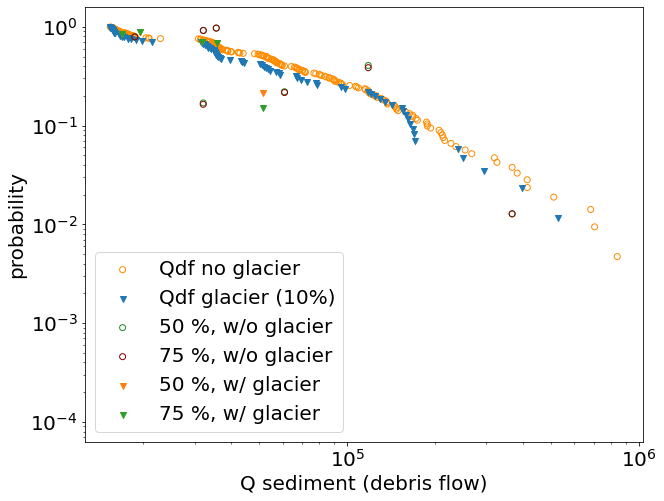

In [12]:
fontsize = 20

fig, ax = plt.subplots(figsize=(10, 8))

# # transport limited - df
ax.scatter(x=Sed_tl_MF.Qdftl.values, y=Sed_tl_MF.prob.values,facecolors='none', edgecolor = 'darkorange',label = 'Qdf no glacier')
ax.scatter(x=Sed_tl_gl_MF.Qdftl.values, y=Sed_tl_gl_MF.prob.values, marker = 'v', label = 'Qdf glacier (10%)')

# # transport limited - Qs
# ax.scatter(x=Sed_tl_sed_MF.Qdftl.values, y=Sed_tl_sed_MF.prob.values, label = 'Qs no glacier')
# ax.scatter(x=Sed_tl_gl_sed_MF.Qdftl.values, y=Sed_tl_gl_sed_MF.prob.values, label = 'Qs glacier')


# supply limited no glacier
# ax.scatter(x=Sed_percent25_MF.Qdftl.values, y=Sed_percent25_MF.prob.values, label = 'Sed_percent25_MF')
ax.scatter(x=Sed_percent50_MF.Qdftl.values, y=Sed_percent50_MF.prob.values,facecolors='none', edgecolor ='forestgreen', label = '50 %, w/o glacier')
ax.scatter(x=Sed_percent75_MF.Qdftl.values, y=Sed_percent75_MF.prob.values, facecolors='none', edgecolor ='darkred',label = '75 %, w/o glacier')

# # # supply limited with glacier 
# # ax.scatter(x=Sed_percent25_gl_MF.Qdftl.values, y=Sed_percent25_gl_MF.prob.values, label = 'Sed_percent25_gl_MF')
ax.scatter(x=Sed_percent50_gl_MF.Qdftl.values, y=Sed_percent50_gl_MF.prob.values, marker = 'v', label = '50 %, w/ glacier')
ax.scatter(x=Sed_percent75_gl_MF.Qdftl.values, y=Sed_percent75_gl_MF.prob.values, marker = 'v', label = '75 %, w/ glacier')


plt.legend(fontsize=fontsize)

ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel('Q sediment (debris flow)', fontsize=fontsize)  # Setting label and fontsize for x-axis
plt.ylabel('probability', fontsize=fontsize)  # Setting label and fontsize for y-axis
plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Set size of major ticks on both axes

# plt.savefig('MF1.png', dpi = 300)

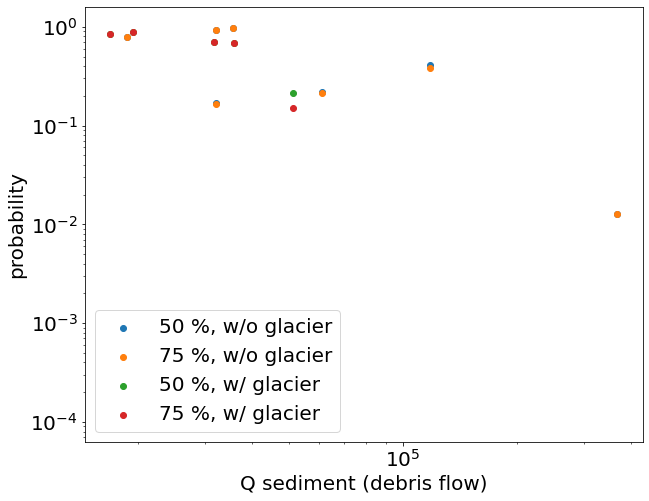

In [13]:
fontsize = 20

fig, ax = plt.subplots(figsize=(10, 8))

# # transport limited - df
# ax.scatter(x=Sed_tl_MF.Qdftl.values, y=Sed_tl_MF.prob.values, label = 'Qdf no glacier')
# ax.scatter(x=Sed_tl_gl_MF.Qdftl.values, y=Sed_tl_gl_MF.prob.values, label = 'Qdf glacier (10%)')

# # transport limited - Qs
# ax.scatter(x=Sed_tl_sed_MF.Qdftl.values, y=Sed_tl_sed_MF.prob.values, label = 'Qs no glacier')
# ax.scatter(x=Sed_tl_gl_sed_MF.Qdftl.values, y=Sed_tl_gl_sed_MF.prob.values, label = 'Qs glacier')


# supply limited no glacier
# ax.scatter(x=Sed_percent25_MF.Qdftl.values, y=Sed_percent25_MF.prob.values, label = 'Sed_percent25_MF')
ax.scatter(x=Sed_percent50_MF.Qdftl.values, y=Sed_percent50_MF.prob.values, label = '50 %, w/o glacier')
ax.scatter(x=Sed_percent75_MF.Qdftl.values, y=Sed_percent75_MF.prob.values, label = '75 %, w/o glacier')


# # supply limited with glacier 
# ax.scatter(x=Sed_percent25_gl_MF.Qdftl.values, y=Sed_percent25_gl_MF.prob.values, label = 'Sed_percent25_gl_MF')
ax.scatter(x=Sed_percent50_gl_MF.Qdftl.values, y=Sed_percent50_gl_MF.prob.values, label = '50 %, w/ glacier')
ax.scatter(x=Sed_percent75_gl_MF.Qdftl.values, y=Sed_percent75_gl_MF.prob.values, label = '75 %, w/ glacier')

plt.legend(fontsize=fontsize)

ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel('Q sediment (debris flow)', fontsize=fontsize)  # Setting label and fontsize for x-axis
plt.ylabel('probability', fontsize=fontsize)  # Setting label and fontsize for y-axis
plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Set size of major ticks on both axes

# plt.savefig('MF1.png', dpi = 300)

## time series plots 

In [54]:
path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/'

columns = ['D', 'Q100', 'sc', 'Qstl', 'Qdfts']
ts1 = 420960
ts2 = 467520



Sed_tl = pd.read_csv(path + 'transport_limited_default/langtang/cellnr19/Sediment.out')[['D', 'Q100', 'sc', 'Qstl', 'Qdftl']][ts1:ts2].set_index('D')
Sed_tl_gl = pd.read_csv(path + 'transport_limited_glaciers/langtang/cellnr21/Sediment.out')[['D', 'Q100', 'sc', 'Qstl', 'Qdftl']][ts1:ts2].set_index('D')

Sed_mean      = pd.read_csv(path + 'supply_limited/langtang_annual_mean/cellnr19/Sediment.out')[['D', 'Q100', 'sc', 'Qstl', 'Qdftl']][ts1:ts2].set_index('D')
Sed_percent25 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean25percent/cellnr19/Sediment.out')[['D', 'Q100', 'sc', 'Qstl', 'Qdftl']][ts1:ts2].set_index('D')
Sed_percent50 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean50percent/cellnr19/Sediment.out')[['D', 'Q100', 'sc', 'Qstl', 'Qdftl']][ts1:ts2].set_index('D')
Sed_percent75 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean75percent/cellnr19/Sediment.out')[['D', 'Q100', 'sc', 'Qstl', 'Qdftl']][ts1:ts2].set_index('D')

Sed_mean_gl     = pd.read_csv(path + 'supply_limited/langtang_GL_annual_mean/cellnr19/Sediment.out')[['D', 'Q100', 'sc', 'Qstl', 'Qdftl']][ts1:ts2].set_index('D')
Sed_percent25_gl = pd.read_csv(path + 'supply_limited/langtang_GL_mean25percent/cellnr19/Sediment.out')[['D', 'Q100', 'sc', 'Qstl', 'Qdftl']][ts1:ts2].set_index('D')
Sed_percent50_gl = pd.read_csv(path + 'supply_limited/langtang_GL_mean50percent/cellnr19/Sediment.out')[['D', 'Q100', 'sc', 'Qstl', 'Qdftl']][ts1:ts2].set_index('D')
Sed_percent75_gl = pd.read_csv(path + 'supply_limited/langtang_GL_mean75percent/cellnr19/Sediment.out')[['D', 'Q100', 'sc', 'Qstl', 'Qdftl']][ts1:ts2].set_index('D')




In [55]:
percent25 = pd.DataFrame()
percent25.index = Sed_tl.index
percent25['sc25'] = Sed_percent25.sc.values
percent25['Q100_25'] = Sed_percent25.Q100.values

percent50 = pd.DataFrame()
percent50.index = Sed_tl.index
percent50['sc50'] = Sed_percent50.sc.values
percent50['Q100_50'] = Sed_percent50.Q100.values


percent75 = pd.DataFrame()
percent75.index = Sed_tl.index
percent75['sc75'] = Sed_percent75.sc.values
percent75['Q100_75'] = Sed_percent75.Q100.values

unlimited = pd.DataFrame()
unlimited.index = Sed_tl.index
unlimited['Qstl'] = Sed_tl.Qstl
unlimited['Qstl_gl'] = Sed_tl_gl.Qstl

<AxesSubplot:xlabel='D'>

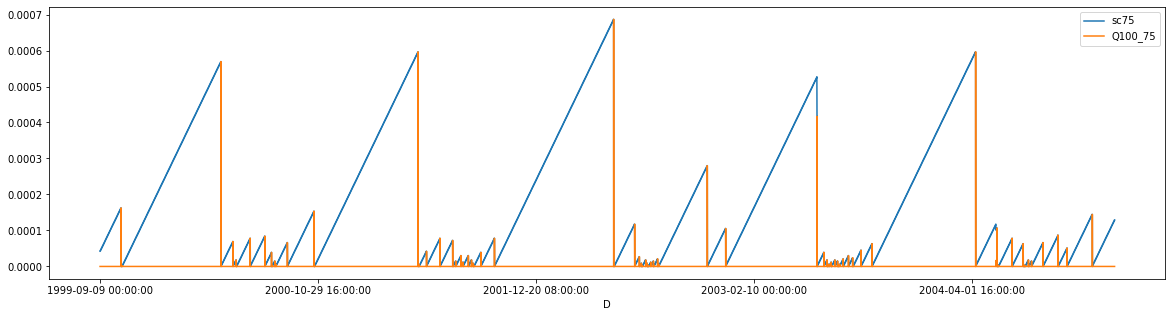

In [56]:
percent75.plot(figsize=(20, 5))

In [86]:
unlimited.index = pd.to_datetime(unlimited.index)
unlimited['Month_Year'] = unlimited.index.strftime('%m - %Y')


# percent75.index = pd.to_datetime(percent75.index)


In [87]:
#



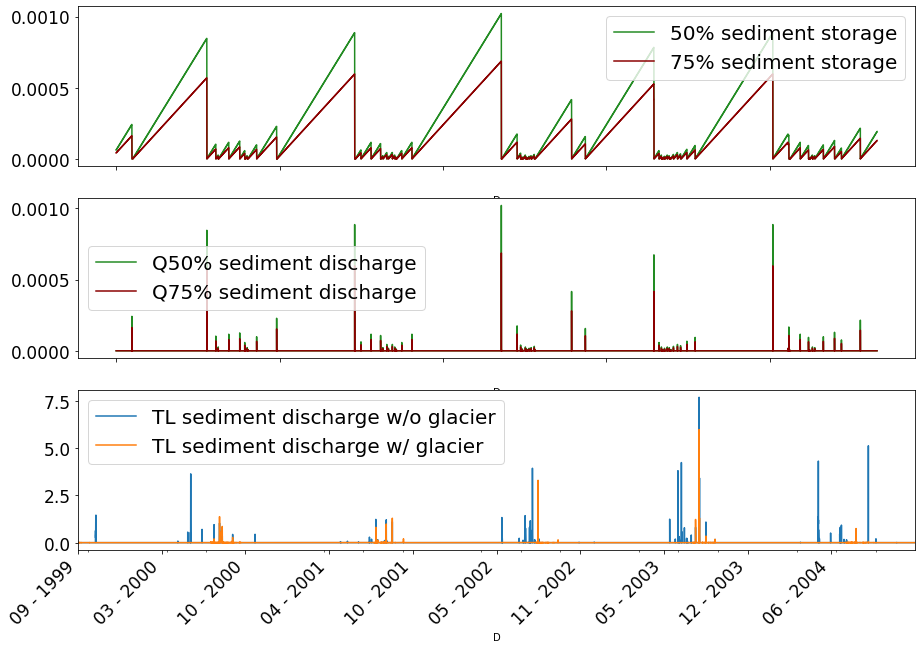

In [91]:


fig = plt.figure(figsize=(15, 10))
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ''')

percent50.sc50.plot(ax=mosaic['a'], label = '50% sediment storage',  color = 'forestgreen')
percent75.sc75.plot(ax=mosaic['a'], label = '75% sediment storage',  color = 'darkred')

percent50.Q100_50.plot(ax=mosaic['b'], label = 'Q50% sediment discharge', color = 'forestgreen')
percent75.Q100_75.plot(ax=mosaic['b'], label = 'Q75% sediment discharge', color = 'darkred')

unlimited.Qstl.plot(ax=mosaic['c'], label = 'TL sediment discharge w/o glacier')
unlimited.Qstl_gl.plot(ax=mosaic['c'], label = 'TL sediment discharge w/ glacier')

mosaic['c'].legend(fontsize = fontsize)
mosaic['a'].legend(fontsize = fontsize)
mosaic['b'].legend(fontsize = fontsize)



# Calculate step size for selecting 10 evenly distributed tick labels
step = max(len(unlimited) // 10, 1)

# Set x-axis tick labels
mosaic['c'].set_xticks(unlimited.index[::step], unlimited['Month_Year'][::step], rotation=45, ha='right')

# mosaic['a'].set_xticks(unlimited.index[::step], unlimited['Month_Year'][::step], rotation=45, ha='right')


mosaic['c'].tick_params(axis='both', which='major', labelsize=17)  # Set size of major ticks on both axes
mosaic['b'].tick_params(axis='both', which='major', labelsize=17)  # Set size of major ticks on both axes
mosaic['a'].tick_params(axis='both', which='major', labelsize=17)  # Set size of major ticks on both axes

# # .xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12*7))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# 
# num_ticks = 10  # Set the desired number of ticks

# plt.gca(ax = mosaic['c']).xaxis.set_major_locator(MaxNLocator(10))
# plt.gca(ax = mosaic['c']).yaxis.set_major_locator(MaxNLocator(10))

# plt.gca(ax = mosaic['a']).xaxis.set_major_locator(MaxNLocator(10))
# plt.gca(ax = mosaic['a']).yaxis.set_major_locator(MaxNLocator(10))

# plt.gca(ax = mosaic['b']).xaxis.set_major_locator(MaxNLocator(10))
# plt.gca(ax = mosaic['b']).yaxis.set_major_locator(MaxNLocator(10))
emptylables = [' ', ' ', ' ', ' ', ' ', ' ', ' ']


# newlables = [' 1', '2 ', '3 ', ' 4', ' 5', '6 ', ' 7']

# mosaic['c'].set_xticklabels(newlables)

mosaic['a'].set_xticklabels(emptylables)
mosaic['b'].set_xticklabels(emptylables)


# plt.savefig('timeseries.png', dpi = 300)

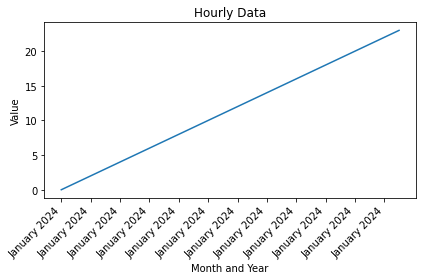

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with hourly data
hourly_data = pd.DataFrame({'Value': range(24)}, index=pd.date_range(start='2024-01-01', periods=24, freq='H'))

# Convert the index to a DateTimeIndex if it's not already
hourly_data.index = pd.to_datetime(hourly_data.index)

# Create a new column containing the month and year
hourly_data['Month_Year'] = hourly_data.index.strftime('%B %Y')

# Plot the data
plt.plot(hourly_data.index, hourly_data['Value'])

# Calculate step size for selecting 10 evenly distributed tick labels
step = max(len(hourly_data) // 10, 1)

# Set x-axis tick labels
plt.xticks(hourly_data.index[::step], hourly_data['Month_Year'][::step], rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month and Year')
plt.ylabel('Value')
plt.title('Hourly Data')

# Show plot
plt.tight_layout()
plt.show()


In [20]:
Sed_mean = pd.read_csv(path + 'supply_limited/langtang_annual_mean/cellnr19/Sediment.out')


In [21]:
Sed_mean

,D,Q0,Q10,Q25,Q50,Q75,Q90,Q100,dfs,sc,ls,Qstl,Qdftl
0,1951-09-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,1951-09-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
2,1951-09-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
3,1951-09-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4,1951-09-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623107,2022-09-30 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00005,0.0,0.0,0.0
623108,2022-09-30 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00005,0.0,0.0,0.0
623109,2022-09-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00005,0.0,0.0,0.0
623110,2022-09-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00005,0.0,0.0,0.0
